### Problem Statement: 
An airlines company wants to have 90% occupancy on a specific route i.e. between two cities for next one year

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# if you want to ignore warnings you can import warnings package
# import warnings

# warnings.filterwarnings('ignore')

In [64]:
# load data

df = pd.read_csv(r'./data/airline-traffic.csv', header=None)

In [65]:
df.head()

,0,1
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [66]:
df.columns  =['Month', 'Passengers']

In [67]:
df.head()

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [68]:
df.dtypes

Month          object
Passengers    float64
dtype: object

In [69]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

In [70]:
df.set_index('Month', inplace=True)

In [71]:
df.dtypes

Passengers    float64
dtype: object

In [72]:
df.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [73]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

### Missing value treatment

In [74]:
# count of missing records

df.isna().sum()

Passengers    4
dtype: int64

In [75]:
# check for missing records

df[df.Passengers.isna()]

,Passengers
Month,
1951-06-01,NaN
1951-07-01,NaN
1954-06-01,NaN
1960-03-01,NaN


In [76]:
# linear interpolate
df.Passengers.interpolate(method='linear', inplace=True)

In [77]:
df.loc[df.index.isin(['1951-06-01','1951-07-01', '1954-06-01', '1960-03-01'])]

,Passengers
Month,
1951-06-01,181.0
1951-07-01,190.0
1954-06-01,268.0
1960-03-01,426.0


In [78]:
df.isna().sum()

Passengers    0
dtype: int64

In [79]:
df['Passengers'] = df['Passengers'].astype('int')

In [80]:
df.dtypes

Passengers    int32
dtype: object

In [81]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


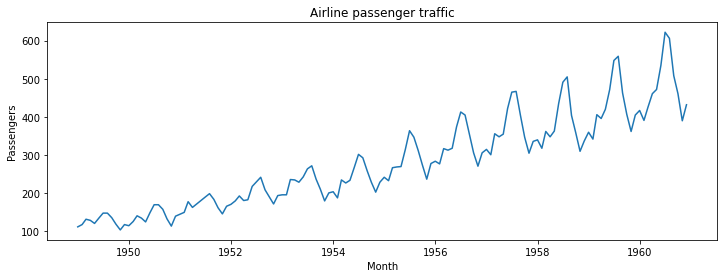

In [82]:
fig, ax = plt.subplots(figsize=(12,4))

sns.lineplot(x = df.index, y = df.Passengers)

ax.set_title('Airline passenger traffic')

plt.show(block=False)

- 144 months of passenger traffic data
- overall trend is upward, i.e. passenger taffic is increasing over the period
- seasonal effect also visible every year

Text(0.5, 1.0, 'Histogram of Passengers travelled')

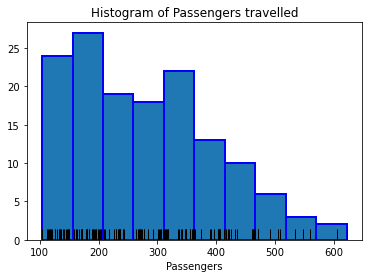

In [109]:
fig, ax = plt.subplots()

sns.distplot(df.Passengers, rug = True, kde = False,
             bins = 10,
            rug_kws = {"color": "k"},
            hist_kws = {"linewidth": 2,"alpha": 1, 'edgecolor':'b'})

ax.set_title('Histogram of Passengers travelled')

Text(0.5, 1.0, 'Box Plot of no. of Passengers')

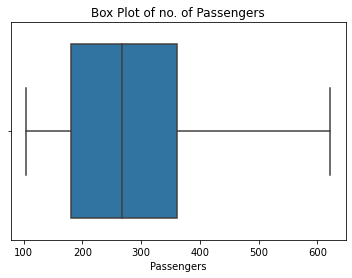

In [113]:
fig, ax = plt.subplots()

box = sns.boxplot(df.Passengers, whis=1.5)

ax.set_title('Box Plot of no. of Passengers')

### Outlier detection

In [116]:
Third_q, First_q = np.percentile(df.Passengers, q = (75, 25))
IQR = Third_q - First_q
print(IQR)

179.75


In [118]:
sum(df.Passengers > (Third_q + 1.5 * IQR))

0

In [119]:
sum(df.Passengers < (First_q - 1.5 * IQR))

0

**No Outliers**

### Decompose Time series data

**Additive Seasonal Decomposition** - the individual components can be added to get the time-series data
<br>
**Multiplicative Seasonal Decomposition** - the individual components can be multiplied to get the time-series data

In [125]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 12,8


In [126]:
## Additive decomposition
decomposition = sm.tsa.seasonal_decompose(df.Passengers, model='additive')

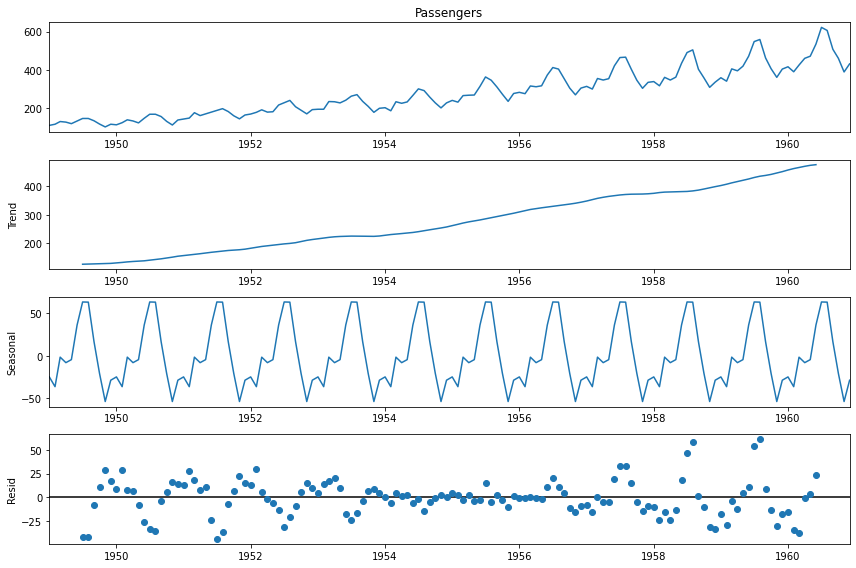

In [127]:
fig = decomposition.plot()
plt.show()

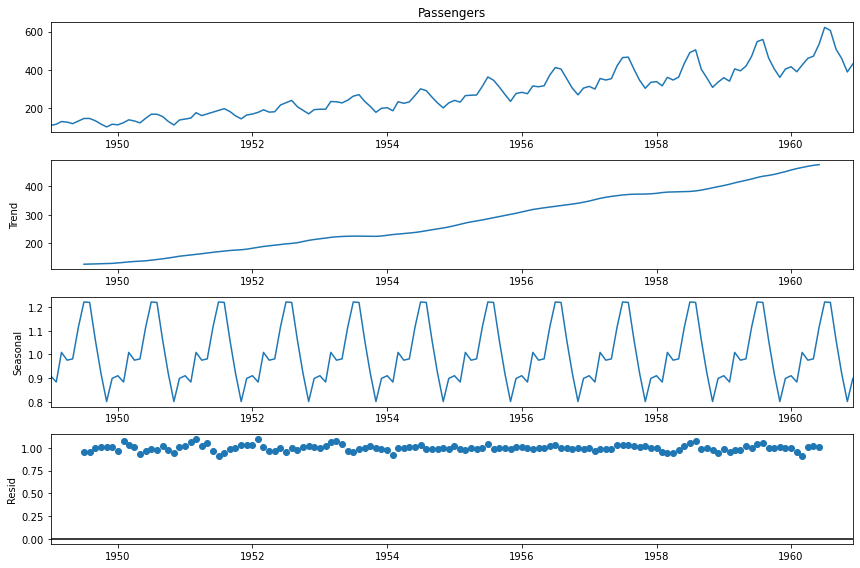

In [129]:
## multiplicative decomposition
decomposition = sm.tsa.seasonal_decompose(df.Passengers, model='multiplicative')

fig = decomposition.plot()

plt.show()